In [1]:
import pandas as pd
from sklearn import model_selection
from tensorflow.keras import Model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

### 1. Data Cleaning

In [3]:
df_raw = pd.read_csv('../two_reactions_022624.csv')
df_raw.tail()

,Unnamed: 0,Temperature,A1,Ea1,A2,Ea2,A3,Ea3,A4,Ea4,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s,Fast_rxn1,Medium_rxn1,Slow_rxn1,Fast_rxn2,Medium_rxn2,Slow_rxn2,Reaction_order,Mechanism
1933581,1933581,273,261.472219,194,0.044413,141,0,0,0,0,0.3,0.294614,0.264231,0.182232,0.166794,0.158981,0.147680,0.142226,0.138849,0.136498,0.134742,0.132256,0.130561,0.129315,0.128356,0.127591,0.126961,0.126439,0.125435,0.124712,0.123742,0.123113,0.122668,0.122203,0.121878,0.121639,0.121454,0.121187,0.121005,0.120770,0.45,0.444614,0.414231,0.332232,0.316794,0.308981,0.297680,0.292226,0.288849,0.286498,0.284742,0.282256,0.280561,0.279315,0.278356,0.277591,0.276961,0.276439,0.275435,0.274712,0.273742,0.273113,0.272668,0.272203,0.271878,0.271639,0.271454,0.271187,0.271005,0.270770,0.9,0.897307,0.882116,0.841116,0.833397,0.829490,0.823840,0.821113,0.819425,0.818249,0.817371,0.816128,0.815280,0.814658,0.814178,0.813796,0.813481,0.813220,0.812717,0.812356,0.811871,0.811556,0.811334,0.811101,0.810939,0.810820,0.810727,0.810594,0.810503,0.810385,0.09,0.087307,0.072116,0.031116,0.023397,0.019490,0.013840,0.011113,0.009425,0.008249,0.007371,0.006128,0.005280,0.004658,0.004178,0.003796,0.003481,0.003220,0.002717,0.002356,0.001871,0.001556,0.001334,0.001101,0.000939,0.000820,0.000727,0.000594,0.000503,0.000385,0.15,0.150001,0.150033,0.151533,0.152891,0.154049,0.156821,0.158977,0.160764,0.162300,0.163651,0.165951,0.167870,0.169517,0.170960,0.172244,0.173401,0.174452,0.176724,0.178618,0.181647,0.184013,0.185946,0.188297,0.190198,0.191782,0.193140,0.195365,0.197137,0.199840,0.0,2.693084e-03,0.017884,0.058884,0.066603,0.070510,0.076160,0.078887,0.080575,0.081751,0.082629,0.083872,0.084720,0.085342,0.085822,0.086204,0.086519,0.086780,0.087283,0.087644,0.08

In [4]:
df_raw.shape

(1933586, 258)

In [6]:
y_raw_df = df_raw.iloc[:, -1:]

In [8]:
unique_values = y_raw_df['Mechanism'].unique()
print(len(unique_values))

456


In [9]:
df = df_raw.copy()
df.shape

(1933586, 258)

In [11]:
conc_list = [col for col in df.columns if col.endswith('s')]
# conc_list

In [12]:
x_df_raw = df[conc_list]
x_df_raw.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.3,0.299999,0.299992,0.299837,0.299675,0.299514,0.299035,0.298564,0.298101,0.297645,0.297197,0.296321,0.295471,0.294644,0.293842,0.293062,0.292304,0.291567,0.289810,0.288156,0.285124,0.282405,0.279936,0.276626,0.273681,0.271057,0.268655,0.264483,0.260906,0.255077,0.45,0.449999,0.449992,0.449837,0.449675,0.449513,0.449035,0.448563,0.448099,0.447641,0.447189,0.446304,0.445441,0.444591,0.443759,0.442944,0.442143,0.441357,0.439447,0.437585,0.434001,0.430589,0.427321,0.422705,0.418420,0.414446,0.410773,0.404216,0.398530,0.389175,0.9,0.900000,0.899996,0.899918,0.899837,0.899757,0.899517,0.899282,0.899049,0.898820,0.898595,0.898152,0.897720,0.897296,0.896880,0.896472,0.896072,0.895679,0.894724,0.893792,0.892001,0.890294,0.888661,0.886353,0.884210,0.882223,0.880387,0.877108,0.874265,0.869588,0.09,0.089999,0.089992,0.089837,0.089675,0.089514,0.089035,0.088565,0.088102,0.087648,0.087201,0.086329,0.085486,0.084671,0.083883,0.083121,0.082384,0.081672,0.079992,0.078441,0.075686,0.073313,0.071243,0.068586,0.066312,0.064363,0.062596,0.059617,0.057093,0.053027,0.0,4.088057e-07,4.087539e-06,0.000082,0.000163,0.000243,0.000482,0.000718,0.000949,0.001177,0.001402,0.001840,0.002264,0.002678,0.003079,0.003469,0.003848,0.004217,0.005095,0.005922,0.007438,0.008797,0.010032,0.011687,0.013159,0.014471,0.015673,0.017758,0.019547,0.022462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.070481e-17,8.090876e-14,6.970219e-10,5.645935e-09,1.811532e-08,1.627378e-07,5.814287e-07,0.000001,0.000002,0.000004,0.000008,0.000015,0.000027,0.000041,0.000059,0.000080,0.000105,0.000182,0.000285,0.000562,0.000908,0.001307,0.001960,0.002631,0.00

In [13]:
x_df_raw.shape

(1933586, 240)

In [14]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Transpose the DataFrame so that rows become columns for scaling
x_df_transposed = x_df_raw.T

# Scale the entire transposed DataFrame
scaled_data = scaler.fit_transform(x_df_transposed)

# Transpose the scaled data back to the original orientation
x = pd.DataFrame(scaled_data.T, columns=x_df_raw.columns, index=x_df_raw.index)


In [15]:
x.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.333333,0.333332,0.333324,0.333152,0.332972,0.332793,0.332261,0.331738,0.331224,0.330717,0.330219,0.329245,0.328301,0.327383,0.326491,0.325624,0.324782,0.323963,0.322011,0.320173,0.316805,0.313784,0.311040,0.307362,0.304090,0.301175,0.298505,0.293870,0.289895,0.283418,0.5,0.499999,0.499991,0.499819,0.499639,0.499459,0.498927,0.498404,0.497887,0.497378,0.496877,0.495894,0.494934,0.493990,0.493066,0.492160,0.491270,0.490397,0.488275,0.486205,0.482223,0.478432,0.474801,0.469672,0.464911,0.460496,0.456415,0.449129,0.442812,0.432417,1.0,1.000000,0.999995,0.999909,0.999819,0.999730,0.999464,0.999202,0.998944,0.998689,0.998438,0.997947,0.997467,0.996995,0.996533,0.996080,0.995635,0.995198,0.994137,0.993103,0.991112,0.989216,0.987401,0.984836,0.982456,0.980248,0.978207,0.974564,0.971406,0.966208,0.1,0.099999,0.099991,0.099819,0.099639,0.099459,0.098928,0.098405,0.097892,0.097386,0.096890,0.095921,0.094985,0.094079,0.093203,0.092356,0.091538,0.090746,0.088880,0.087157,0.084096,0.081459,0.079159,0.076207,0.073680,0.071514,0.069551,0.066241,0.063437,0.058919,0.0,4.542286e-07,4.541710e-06,0.000091,0.000181,0.000270,0.000536,0.000798,0.001055,0.001308,0.001557,0.002044,0.002516,0.002975,0.003421,0.003855,0.004276,0.004685,0.005661,0.006580,0.008264,0.009775,0.011147,0.012986,0.014621,0.016079,0.017414,0.019731,0.021719,0.024957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.967202e-17,8.989862e-14,7.744688e-10,6.273261e-09,2.012814e-08,1.808198e-07,6.460319e-07,0.000001,0.000003,0.000004,0.000009,0.000017,0.000029,0.000046,0.000066,0.000089,0.000116,0.000202,0.000317,0.000624,0.001009,0.001452,0.002178,0.002923

In [16]:
x.shape

(1933586, 240)

In [19]:
y_df = df.iloc[:, -1:]
# y_df

In [20]:
y_df_oh = pd.get_dummies(y_df, columns = ['Mechanism']) 
y_df_oh

,"Mechanism_(0, 146)","Mechanism_(0, 147)","Mechanism_(0, 154)","Mechanism_(0, 155)","Mechanism_(1, 146)","Mechanism_(1, 147)","Mechanism_(1, 154)","Mechanism_(1, 155)","Mechanism_(101, 126)","Mechanism_(101, 162)","Mechanism_(101, 163)","Mechanism_(101, 179)","Mechanism_(101, 216)","Mechanism_(101, 217)","Mechanism_(101, 232)","Mechanism_(101, 270)","Mechanism_(101, 271)","Mechanism_(101, 285)","Mechanism_(101, 324)","Mechanism_(101, 325)","Mechanism_(101, 334)","Mechanism_(101, 382)","Mechanism_(101, 400)","Mechanism_(101, 448)","Mechanism_(101, 466)","Mechanism_(101, 514)","Mechanism_(101, 532)","Mechanism_(101, 580)","Mechanism_(104, 142)","Mechanism_(104, 174)","Mechanism_(104, 196)","Mechanism_(104, 228)","Mechanism_(105, 142)","Mechanism_(105, 143)","Mechanism_(105, 174)","Mechanism_(105, 175)","Mechanism_(105, 196)","Mechanism_(105, 197)","Mechanism_(105, 228)","Mechanism_(105, 229)","Mechanism_(108, 138)","Mechanism_(108, 170)","Mechanism_(108, 192)","Mechanism_(108, 224)","Mechanism_(108, 246)","Mechanism_(108, 278)","Mechanism_(108, 300)","Mechanism_(108, 332)","Mechanism_(109, 138)","Mechanism_(109, 139)","Mechanism_(109, 170)","Mechanism_(109, 171)","Mechanism_(109, 192)","Mechanism_(109, 193)","Mechanism_(109, 224)","Mechanism_(109, 225)","Mechanism_(109, 246)","Mechanism_(109, 247)","Mechanism_(109, 278)","Mechanism_(109, 279)","Mechanism_(109, 300)","Mechanism_(109, 301)","Mechanism_(109, 332)","Mechanism_(109, 333)","Mechanism_(11, 126)","Mechanism_(11, 162)","Mechanism_(11, 163)","Mechanism_(11, 334)","Mechanism_(11, 382)","Mechanism_(113, 128)","Mechanism_(113, 166)","Mechanism_(113, 167)","Mechanism_(113, 181)","Mechanism_(113, 220)","Mechanism_(113, 221)","Mechanism_(113, 338)","Mechanism_(113, 386)","Mechanism_(113, 404)","Mechanism_(113, 452)","Mechanism_(117, 126)","Mechanism_(117, 162)","Mechanism_(117, 163)","Mechanism_(117, 179)","Mechanism_(117, 216)","Mechanism_(117, 217)","Mechanism_(117, 232)","Mechanism_(117, 270)","Mechanism_(117, 271)","Mechanism_(117, 285)","Mechanism_(117, 324)","Mechanism_(117, 325)","Mechanism_(117, 334)","Mechanism_(117, 382)","Mechanism_(117, 400)","Mechanism_(117, 448)","Mechanism_(117, 466)","Mechanism_(117, 514)","Mechanism_(117, 532)","Mechanism_(117, 580)","Mechanism_(12, 138)","Mechanism_(12, 170)","Mechanism_(120, 142)","Mechanism_(120, 174)","Mechanism_(120, 196)","Mechanism_(120, 228)","Mechanism_(121, 142)","Mechanism_(121, 143)","Mechanism_(121, 174)","Mechanism_(121, 175)","Mechanism_(121, 196)","Mechanism_(121, 197)","Mechanism_(121, 228)","Mechanism_(121, 229)","Mechanism_(124, 138)","Mechanism_(124, 170)","Mechanism_(124, 192)","Mechanism_(124, 224)","Mechanism_(124, 246)","Mechanism_(124, 278)","Mechanism_(124, 300)","Mechanism_(124, 332)","Mechanism_(125, 138)","Mechanism_(125, 139)","Mechanism_(125, 170)","Mechanism_(125, 171)","Mechanism_(125, 192)","Mechanism_(125, 193)","Mechanism_(125, 224)","Mechanism_(125, 225)","Mechanism_(125, 246)","Mechanism_(125, 247)","Mechanism_(125, 278)","Mechanism_(125, 279)","Mechanism_(125, 300)","Mechanism_(125, 301)","Mechanism_(125, 332)","Mechanism_(125, 333)","Mechanism_(13, 138)","Mechanism_(13, 139)","Mechanism_(13, 170)","Mechanism_(13, 171)","Mechanism_(16, 146)","Mechanism_(16, 147)","Mechanism_(16, 154)","Mechanism_(16, 155)","Mechanism_(16, 200)","Mechanism_(16, 201)","Mechanism_(16, 208)","Mechanism_(16, 209)","Mechanism_(17, 146)","Mechanism_(17, 147)","Mechanism_(17, 154)","Mechanism_(17, 155)","Mechanism_(17, 200)","Mechanism_(17, 201)","Mechanism_(17, 208)","Mechanism_(17, 209)","Mechanism_(24, 146)","Mechanism_(24, 147)","Mechanism_(24, 154)","Mechanism_(24, 155)","Mechanism_(24, 200)","Mechanism_(24, 201)","Mechanism_(24, 208)","Mechanism_(24, 209)","Mechanism_(25, 146)","Mechanism_(25, 147)","Mechanism_(25, 154)","Mechanism_(25, 155)","Mechanism_(25, 200)","Mechanism_(25, 201)","Mechanism_(25, 208)","Mechanism_(25, 209)","Mechanism_(29, 126)","Mechanism_(29, 162)","Mechanism_(29, 163)","Mechanism_(2

### 2. CNN Model

#### 2.1 Split Dataset

In [22]:
x.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.333333,0.333332,0.333324,0.333152,0.332972,0.332793,0.332261,0.331738,0.331224,0.330717,0.330219,0.329245,0.328301,0.327383,0.326491,0.325624,0.324782,0.323963,0.322011,0.320173,0.316805,0.313784,0.311040,0.307362,0.304090,0.301175,0.298505,0.293870,0.289895,0.283418,0.5,0.499999,0.499991,0.499819,0.499639,0.499459,0.498927,0.498404,0.497887,0.497378,0.496877,0.495894,0.494934,0.493990,0.493066,0.492160,0.491270,0.490397,0.488275,0.486205,0.482223,0.478432,0.474801,0.469672,0.464911,0.460496,0.456415,0.449129,0.442812,0.432417,1.0,1.000000,0.999995,0.999909,0.999819,0.999730,0.999464,0.999202,0.998944,0.998689,0.998438,0.997947,0.997467,0.996995,0.996533,0.996080,0.995635,0.995198,0.994137,0.993103,0.991112,0.989216,0.987401,0.984836,0.982456,0.980248,0.978207,0.974564,0.971406,0.966208,0.1,0.099999,0.099991,0.099819,0.099639,0.099459,0.098928,0.098405,0.097892,0.097386,0.096890,0.095921,0.094985,0.094079,0.093203,0.092356,0.091538,0.090746,0.088880,0.087157,0.084096,0.081459,0.079159,0.076207,0.073680,0.071514,0.069551,0.066241,0.063437,0.058919,0.0,4.542286e-07,4.541710e-06,0.000091,0.000181,0.000270,0.000536,0.000798,0.001055,0.001308,0.001557,0.002044,0.002516,0.002975,0.003421,0.003855,0.004276,0.004685,0.005661,0.006580,0.008264,0.009775,0.011147,0.012986,0.014621,0.016079,0.017414,0.019731,0.021719,0.024957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.967202e-17,8.989862e-14,7.744688e-10,6.273261e-09,2.012814e-08,1.808198e-07,6.460319e-07,0.000001,0.000003,0.000004,0.000009,0.000017,0.000029,0.000046,0.000066,0.000089,0.000116,0.000202,0.000317,0.000624,0.001009,0.001452,0.002178,0.002923

In [23]:
x.shape

(1933586, 240)

In [24]:
y_df = y_df_oh.copy()
y_df.head()

,"Mechanism_(0, 146)","Mechanism_(0, 147)","Mechanism_(0, 154)","Mechanism_(0, 155)","Mechanism_(1, 146)","Mechanism_(1, 147)","Mechanism_(1, 154)","Mechanism_(1, 155)","Mechanism_(101, 126)","Mechanism_(101, 162)","Mechanism_(101, 163)","Mechanism_(101, 179)","Mechanism_(101, 216)","Mechanism_(101, 217)","Mechanism_(101, 232)","Mechanism_(101, 270)","Mechanism_(101, 271)","Mechanism_(101, 285)","Mechanism_(101, 324)","Mechanism_(101, 325)","Mechanism_(101, 334)","Mechanism_(101, 382)","Mechanism_(101, 400)","Mechanism_(101, 448)","Mechanism_(101, 466)","Mechanism_(101, 514)","Mechanism_(101, 532)","Mechanism_(101, 580)","Mechanism_(104, 142)","Mechanism_(104, 174)","Mechanism_(104, 196)","Mechanism_(104, 228)","Mechanism_(105, 142)","Mechanism_(105, 143)","Mechanism_(105, 174)","Mechanism_(105, 175)","Mechanism_(105, 196)","Mechanism_(105, 197)","Mechanism_(105, 228)","Mechanism_(105, 229)","Mechanism_(108, 138)","Mechanism_(108, 170)","Mechanism_(108, 192)","Mechanism_(108, 224)","Mechanism_(108, 246)","Mechanism_(108, 278)","Mechanism_(108, 300)","Mechanism_(108, 332)","Mechanism_(109, 138)","Mechanism_(109, 139)","Mechanism_(109, 170)","Mechanism_(109, 171)","Mechanism_(109, 192)","Mechanism_(109, 193)","Mechanism_(109, 224)","Mechanism_(109, 225)","Mechanism_(109, 246)","Mechanism_(109, 247)","Mechanism_(109, 278)","Mechanism_(109, 279)","Mechanism_(109, 300)","Mechanism_(109, 301)","Mechanism_(109, 332)","Mechanism_(109, 333)","Mechanism_(11, 126)","Mechanism_(11, 162)","Mechanism_(11, 163)","Mechanism_(11, 334)","Mechanism_(11, 382)","Mechanism_(113, 128)","Mechanism_(113, 166)","Mechanism_(113, 167)","Mechanism_(113, 181)","Mechanism_(113, 220)","Mechanism_(113, 221)","Mechanism_(113, 338)","Mechanism_(113, 386)","Mechanism_(113, 404)","Mechanism_(113, 452)","Mechanism_(117, 126)","Mechanism_(117, 162)","Mechanism_(117, 163)","Mechanism_(117, 179)","Mechanism_(117, 216)","Mechanism_(117, 217)","Mechanism_(117, 232)","Mechanism_(117, 270)","Mechanism_(117, 271)","Mechanism_(117, 285)","Mechanism_(117, 324)","Mechanism_(117, 325)","Mechanism_(117, 334)","Mechanism_(117, 382)","Mechanism_(117, 400)","Mechanism_(117, 448)","Mechanism_(117, 466)","Mechanism_(117, 514)","Mechanism_(117, 532)","Mechanism_(117, 580)","Mechanism_(12, 138)","Mechanism_(12, 170)","Mechanism_(120, 142)","Mechanism_(120, 174)","Mechanism_(120, 196)","Mechanism_(120, 228)","Mechanism_(121, 142)","Mechanism_(121, 143)","Mechanism_(121, 174)","Mechanism_(121, 175)","Mechanism_(121, 196)","Mechanism_(121, 197)","Mechanism_(121, 228)","Mechanism_(121, 229)","Mechanism_(124, 138)","Mechanism_(124, 170)","Mechanism_(124, 192)","Mechanism_(124, 224)","Mechanism_(124, 246)","Mechanism_(124, 278)","Mechanism_(124, 300)","Mechanism_(124, 332)","Mechanism_(125, 138)","Mechanism_(125, 139)","Mechanism_(125, 170)","Mechanism_(125, 171)","Mechanism_(125, 192)","Mechanism_(125, 193)","Mechanism_(125, 224)","Mechanism_(125, 225)","Mechanism_(125, 246)","Mechanism_(125, 247)","Mechanism_(125, 278)","Mechanism_(125, 279)","Mechanism_(125, 300)","Mechanism_(125, 301)","Mechanism_(125, 332)","Mechanism_(125, 333)","Mechanism_(13, 138)","Mechanism_(13, 139)","Mechanism_(13, 170)","Mechanism_(13, 171)","Mechanism_(16, 146)","Mechanism_(16, 147)","Mechanism_(16, 154)","Mechanism_(16, 155)","Mechanism_(16, 200)","Mechanism_(16, 201)","Mechanism_(16, 208)","Mechanism_(16, 209)","Mechanism_(17, 146)","Mechanism_(17, 147)","Mechanism_(17, 154)","Mechanism_(17, 155)","Mechanism_(17, 200)","Mechanism_(17, 201)","Mechanism_(17, 208)","Mechanism_(17, 209)","Mechanism_(24, 146)","Mechanism_(24, 147)","Mechanism_(24, 154)","Mechanism_(24, 155)","Mechanism_(24, 200)","Mechanism_(24, 201)","Mechanism_(24, 208)","Mechanism_(24, 209)","Mechanism_(25, 146)","Mechanism_(25, 147)","Mechanism_(25, 154)","Mechanism_(25, 155)","Mechanism_(25, 200)","Mechanism_(25, 201)","Mechanism_(25, 208)","Mechanism_(25, 209)","Mechanism_(29, 126)","Mechanism_(29, 162)","Mechanism_(29, 163)","Mechanism_(2

In [25]:
y_df.shape

(1933586, 456)

In [26]:
y = np.where(y_df, 1, 0)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
x_train_df, x_val_df, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.05, random_state=37)

In [28]:
print('Training set size:  ',x_train_df.shape, y_train.shape)
print('Validation set size:',x_val_df.shape, y_val.shape)

Training set size:   (1836906, 240) (1836906, 456)
Validation set size: (96680, 240) (96680, 456)


In [29]:
x_train_df.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
1459100,0.666666,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.333312,0.333066,0.328139,0.323126,0.318280,0.304669,0.292298,0.280986,0.270614,0.261038,0.243972,0.229186,0.216212,0.204747,0.194524,0.185340,0.177048,0.159415,0.145150,0.123416,0.107571,0.095468,0.081828,0.071694,0.063846,0.057580,0.048207,0.041499,0.032520,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,9.999909e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.469748e-05,0.000133,2.597128e-03,5.103611e-03,7.526593e-03,0.014332,0.020518,0.02617

In [30]:
number_of_species = 8

In [31]:
def reshape_x(x_df_raw):
    data = x_df_raw.values
    # 12 species and 30 time points. 29 points for derivatives
    time_points = 30
    num_curves = number_of_species # number of species
    num_experiments = len(data)
    # print(num_curves)
    # print(num_experiments)

    # Reshape the data into a 3D array
    # data_3d = data.reshape(num_experiments, -1, time_points)
    data_3d = data.reshape(num_experiments, num_curves, time_points)
    data_3d
    x = data_3d.swapaxes(1,2)
    # x = reshaped_data_3d.tolist()
    # x[0]
    return x

In [32]:
x_train_df.shape

(1836906, 240)

In [33]:
x_train = reshape_x(x_train_df)
x_val = reshape_x(x_val_df)
# print(x2_train_raw)
# print(x2_val_raw)

In [36]:
print('Training set size:  ',x_train.shape, y_train.shape)
print('Validation set size:',x_val.shape, y_val.shape)

Training set size:   (1836906, 30, 8) (1836906, 456)
Validation set size: (96680, 30, 8) (96680, 456)


In [51]:
def create_model_conv_with_dropout(input_shape, output_shape):
    kinetics = Input(shape=input_shape)

    # First convolutional layer
    conv1 = Conv1D(filters=128, kernel_size=4, activation='relu')(kinetics)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    dropout1 = Dropout(0.2)(pool1)
    # print(pool1)

    # Second convolutional layer
    conv2 = Conv1D(filters=256, kernel_size=4, activation='relu')(dropout1)
    pool2 = MaxPooling1D(pool_size=2)(conv2)
    dropout2 = Dropout(0.2)(pool2)
    # print(pool2)

    # Flatten layer
    flat = Flatten()(dropout2)
    # print(flat)

    # Output layer
    pred = Dense(output_shape[1], activation='softmax', name='Dense_5')(flat)

    model = Model(inputs=kinetics, outputs=pred)

    return model


In [52]:
print(x_train[20][0].shape[-1])
# print(x_train)
print(y_train.shape)
print(len(x_train[20]))

8
(1836906, 456)
30


#### 2.2 Train CNN Model

In [53]:
# Compile the model
model = create_model_conv_with_dropout(input_shape = (30,x_train[20][0].shape[-1]), output_shape = y_train.shape)
optimizer = Adam(learning_rate=0.01)  # Adjust learning rate if needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("best_model_weights_NN_Convolution+Dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=300, verbose=1, mode='max', restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, epochs=3000, batch_size=512, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/3000
3587/3588 [============================>.] - ETA: 0s - loss: 2.3428 - accuracy: 0.2629
Epoch 1: val_accuracy improved from -inf to 0.34841, saving model to best_model_weights_NN_Convolution+Dropout.h5
3588/3588 [==============================] - 178s 50ms/step - loss: 2.3428 - accuracy: 0.2629 - val_loss: 1.8760 - val_accuracy: 0.3484
Epoch 2/3000
   1/3588 [..............................] - ETA: 3:04 - loss: 1.9216 - accuracy: 0.3320

C:\Users\I0512620\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3588/3588 [==============================] - ETA: 0s - loss: 1.9159 - accuracy: 0.3314
Epoch 2: val_accuracy improved from 0.34841 to 0.36868, saving model to best_model_weights_NN_Convolution+Dropout.h5
3588/3588 [==============================] - 189s 53ms/step - loss: 1.9159 - accuracy: 0.3314 - val_loss: 1.7985 - val_accuracy: 0.3687
Epoch 3/3000
3587/3588 [============================>.] - ETA: 0s - loss: 1.8403 - accuracy: 0.3464
Epoch 3: val_accuracy improved from 0.36868 to 0.37059, saving model to best_model_weights_NN_Convolution+Dropout.h5
3588/3588 [==============================] - 154s 43ms/step - loss: 1.8403 - accuracy: 0.3464 - val_loss: 1.8152 - val_accuracy: 0.3706
Epoch 4/3000
3587/3588 [============================>.] - ETA: 0s - loss: 1.7998 - accuracy: 0.3539
Epoch 4: val_accuracy did not improve from 0.37059
3588/3588 [==============================] - 160s 45ms/step - loss: 1.7998 - accuracy: 0.3539 - val_loss: 1.8469 - val_accuracy: 0.3627
Epoch 5/3000
3588/35

In [54]:
model.save('Step 3_NN_Convolution+Dropout.h5')

In [38]:
joblib.dump(model, 'Step 3_NN_Convolution+Dropout.joblib')

In [39]:
model = joblib.load('Step 3_NN_Convolution+Dropout.joblib')

In [39]:
# model.load_weights("Step 3_NN_Convolution+Dropout.h5")

In [51]:
model = load_model('Step 3_NN_Convolution+Dropout.h5')

In [40]:
y_pred = model.predict(x_val)

3022/3022 [==============================] - 35s 12ms/step


In [41]:
print(y_val)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(y_pred)

[[4.9023781e-18 1.2217395e-15 8.0181874e-20 ... 6.3000211e-31
  8.3774538e-26 2.0266776e-31]
 [3.4751191e-31 8.0812415e-33 1.1157857e-23 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.1415811e-22 4.9266439e-30 1.8860913e-22 ... 0.0000000e+00
  1.3857519e-33 0.0000000e+00]
 ...
 [2.0640585e-20 7.2756856e-22 5.6812117e-18 ... 2.4380820e-14
  1.2175377e-09 8.3656274e-14]
 [0.0000000e+00 0.0000000e+00 1.3736256e-34 ... 5.9965863e-25
  0.0000000e+00 3.9883755e-25]
 [4.3381280e-18 2.3697103e-18 6.3664907e-19 ... 1.1563906e-06
  2.6823500e-08 1.9541701e-06]]


In [43]:
# Convert the list of lists to a numpy array
data_array = np.array(y_pred)

# Get the index of the maximum value in each list
max_indices = np.argmax(data_array, axis=1)

# Create a new array with the same shape as data_array, filled with zeros
y_pred_result = np.zeros_like(data_array)

# Set the maximum value indices to 1 in each row
y_pred_result[np.arange(len(data_array)), max_indices] = 1

print(y_pred_result)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
def convert_list_to_index(y):
    # Convert the list of lists to a numpy array
    data_array = np.array(y)

    # Get the index of the maximum value in each list
    max_indices = np.argmax(data_array, axis=1)

    # Add 1 to each index to get index+1
    index_plus_one = max_indices + 1

    print(index_plus_one)

    return index_plus_one

In [45]:
y_pred_mech = convert_list_to_index(y_pred_result)
y_val_mech = convert_list_to_index(y_val)

[306 402  64 ... 111 136 147]
[306 402  60 ... 131 132 154]


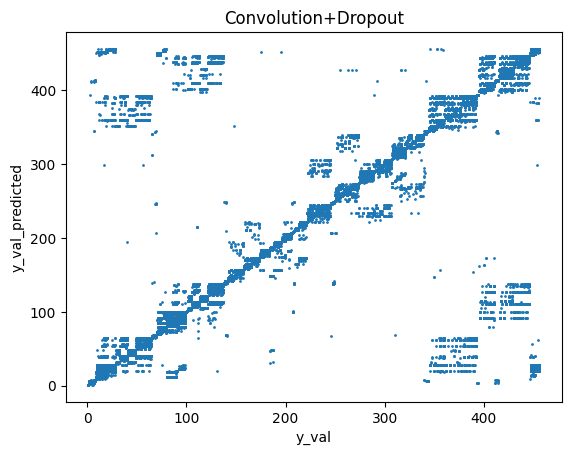

In [46]:
# Plotting the data
plt.scatter(y_val_mech, y_pred_mech, marker='o', s = 1, label='Data Points')

# Adding labels and title
plt.xlabel('y_val')
plt.ylabel('y_val_predicted')
plt.title('Convolution+Dropout')

# # Adding a legend
# plt.legend()

# Display the plot
plt.show()

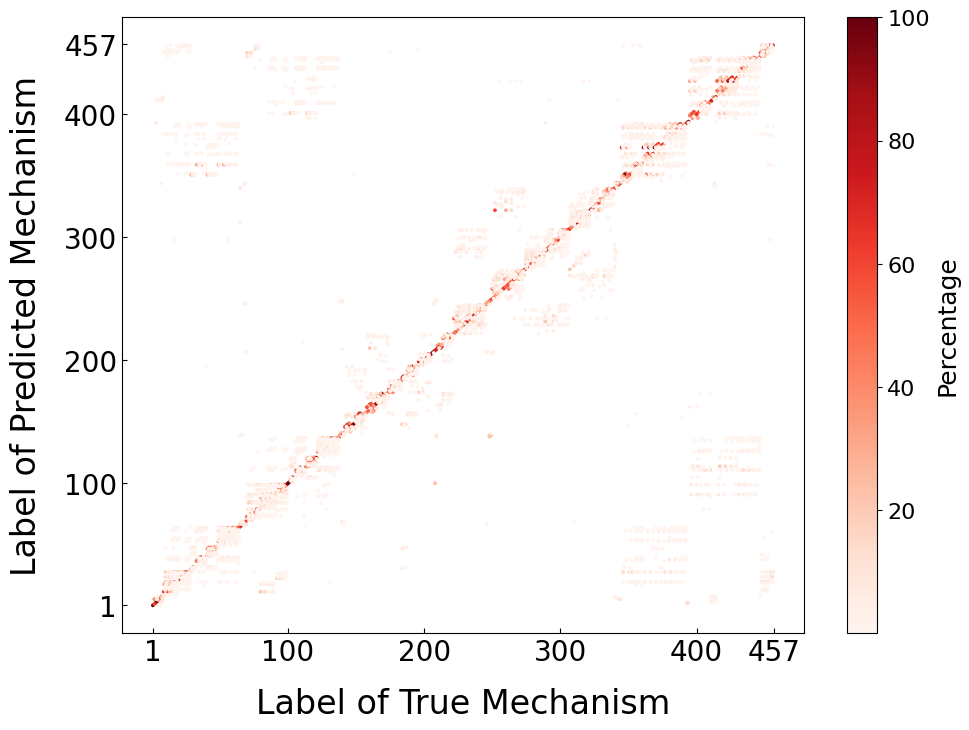

In [48]:
# Calculate the percentage of correct predictions for each unique pair of true and predicted values
count_dict = {} 
for true_val, pred_val in zip(y_val_mech, y_pred_mech):
    if (true_val, pred_val) not in count_dict:
        count_dict[(true_val, pred_val)] = 1
    else:
        count_dict[(true_val, pred_val)] += 1
# print(count_dict)

# Calculate total counts for each value starting from 1 to 456 for key[0]
total_counts = {}
for i in range(1, 457):
    total_counts[i] = sum(value for key, value in count_dict.items() if key[0] == i)
# print(total_counts)


# Calculate percentages
percentages = {}
for key, value in count_dict.items():
    # print(key)
    # print(value)
    percentages[key] = (value / total_counts[key[0]]) * 100
# print(percentages)

# Extract x and y data for the scatter plot
x_data = [key[0] for key in percentages]
y_data = [key[1] for key in percentages]
colors = [value for value in percentages.values()]

plt.figure(figsize=(11, 8))  # Adjust width and height as needed

# Create the scatter plot
# plt.scatter(x_data, y_data, c=colors, cmap='viridis', s = 1)
plt.scatter(x_data, y_data, c=colors, cmap='Reds', s = 3) #, zorder=1)


# Adding labels and title
plt.xlabel('Label of True Mechanism', fontsize = 24, labelpad=15)
plt.ylabel('Label of Predicted Mechanism', fontsize = 24, labelpad=15)
# plt.title('Scatter Plot')

# Add color bar
cbar = plt.colorbar(ticks=[0, 20, 40, 60, 80, 100])
cbar.set_label('Percentage', fontsize=18)  # Adjust the fontsize and labelpad as needed
# Set font size of ticks in color bar
cbar.ax.tick_params(labelsize=16)  # Adjust the font size as needed

# Add axis ticks
plt.xticks([1, 100, 200, 300, 400, 457], fontsize = 20)  # Adjust the range and step size for x-axis ticks
plt.yticks([1, 100, 200, 300, 400, 457], fontsize = 20)  # Adjust the range and step size for x-axis ticks
plt.tick_params(axis='both', direction='in')  # Set ticks to be inside the plot


plt.show()

In [47]:
def calculate_matched_percentage(list1, list2):
    # Ensure that both lists have the same length
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")

    # Initialize a counter for matches
    num_matches = 0

    # Iterate over each pair of elements in the lists
    for item1, item2 in zip(list1, list2):
        # Check if the items match
        if item1 == item2:
            num_matches += 1

    # Calculate the percentage of matched values
    matched_percentage = (num_matches / len(list1)) * 100

    return matched_percentage

# Assuming y_pred_mech and y_val_mech are lists containing predicted and true values respectively
matched_percentage = calculate_matched_percentage(y_pred_mech, y_val_mech)
print("Percentage of matched values:", matched_percentage)


Percentage of matched values: 42.79168390566818
